In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
train_ds = image_dataset_from_directory(
    'data/tiled_images/keras',
    batch_size=32,
    subset='training',
    seed=123,
    validation_split=0.3
).map(lambda x, y: (x/255, y))

val_ds = image_dataset_from_directory(
    'data/tiled_images/keras',
    batch_size=32,
    subset='validation',
    seed=123,
    validation_split=0.3
).map(lambda x, y: (x/255, y))

Found 378307 files belonging to 2 classes.
Using 264815 files for training.
Found 378307 files belonging to 2 classes.
Using 113492 files for validation.


In [51]:
# train_ds = image_dataset_from_directory(
#     'data/keras_subset',
#     batch_size=32,
#     subset='training',
#     seed=123,
#     validation_split=0.2
# ).map(lambda x, y: (x/255, y))

# val_ds = image_dataset_from_directory(
#     'data/keras_subset',
#     batch_size=32,
#     subset='validation',
#     seed=123,
#     validation_split=0.2
# ).map(lambda x, y: (x/255, y))

Found 295 files belonging to 2 classes.
Using 236 files for training.
Found 295 files belonging to 2 classes.
Using 59 files for validation.


In [3]:
model = keras.models.Sequential([
    Conv2D(25, 3, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2),
    Conv2D(50, 3, activation='relu'),
    MaxPooling2D(2),
    Conv2D(100, 3, activation='relu'),
    MaxPooling2D(2),    
    Flatten(),
    # Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(1, activation='sigmoid')
])


es = EarlyStopping(monitor = 'val_loss', patience = 2)

model.compile(
    loss='bce',
    optimizer='rmsprop',
    metrics=['acc']
)


In [4]:
history = model.fit(train_ds, validation_data=val_ds, epochs=5, callbacks=[es])

Epoch 1/5


8276/8276 [==============================] - 6717s 811ms/step - loss: 0.5102 - acc: 0.7624 - val_loss: 0.4413 - val_acc: 0.8057
Epoch 2/5
8276/8276 [==============================] - 6663s 805ms/step - loss: 0.4808 - acc: 0.7916 - val_loss: 0.6507 - val_acc: 0.7580
Epoch 3/5
8276/8276 [==============================] - 5843s 706ms/step - loss: 0.4969 - acc: 0.7854 - val_loss: 0.4829 - val_acc: 0.7771


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 25)      700       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 25)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 50)      11300     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 100)       45100     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 100)       0

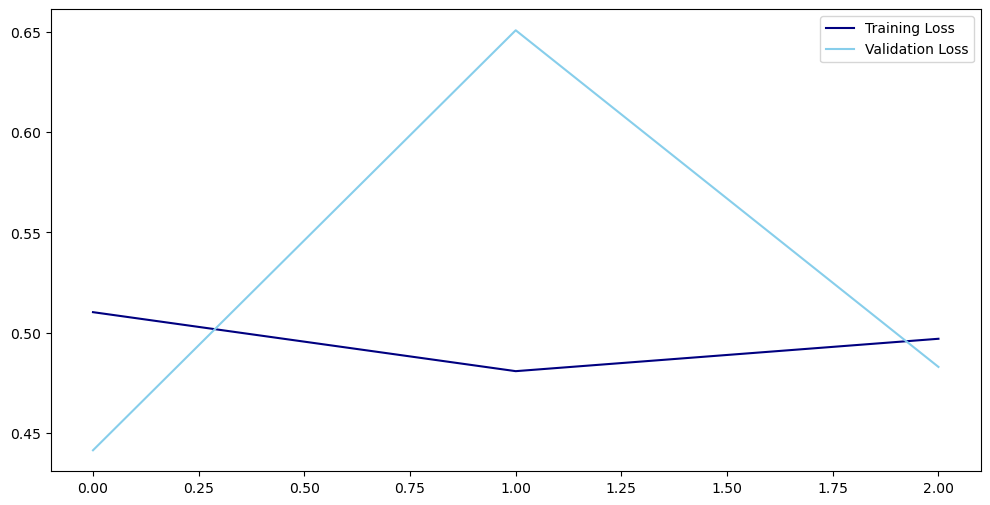

In [6]:
# Check out the plot of loss vs epoch. How's our model?
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();